In [1]:
!pip install tellurium

import tellurium as te

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.8 MB/s eta 0:00:00


In [30]:
import matplotlib.pyplot as plt
import numpy as np

model = te.loadSBMLModel('Aavani2019.xml')

In [23]:
print("List of Species:")
for species in model.getFloatingSpeciesIds():
    print(species)

List of Species:
C_Uninfected_CD4
I_Infected_CD4
F_CTL
V_Virus


In [24]:
print("List of Reactions:")
for reaction in model.getReactionIds():
    print(reaction)

List of Reactions:
CD4_Uninfected_Growth
CD4_Uninfected_Death
CD4_Infected_Death
CTL_Death
Virus_Degradation
CD4_Uninfected_Infection
CD4_Infected_Clearance_CTL
CTL_Stimulation
Virus_Production


In [25]:
print("List of Parameters:")
for param in model.getGlobalParameterIds():
    print(param)

List of Parameters:
C_ast
N
beta
lambda
a
k
d_0
a_L
rho
b
e


In [26]:
print("Number of Species:", model.getNumFloatingSpecies())
print("Number of Reactions:", model.getNumReactions())
print("Number of Parameters:", model.getNumGlobalParameters())

Number of Species: 4
Number of Reactions: 9
Number of Parameters: 11


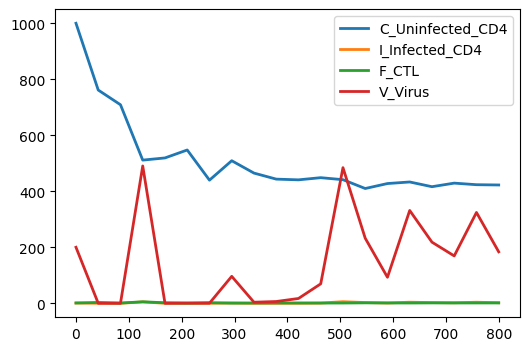

In [13]:
model.plot()

In [31]:
result = model.simulate(0, 800, 20, ['time', 'C_Uninfected_CD4', 'I_Infected_CD4', 'F_CTL', 'V_Virus'])
result

       time, C_Uninfected_CD4, I_Infected_CD4,    F_CTL,     V_Virus
 [[       0,             1000,              1,        1,         200],
  [ 42.1053,          761.531,    3.28503e-10,  2.92067, 2.87424e-08],
  [ 84.2105,           709.03,    1.35919e-05, 0.822691,  0.00110946],
  [ 126.316,          511.299,        4.83158,   5.3268,     490.403],
  [ 168.421,          519.089,    1.43346e-06,  1.82416, 0.000125812],
  [ 210.526,          547.458,      0.0071167, 0.533685,    0.591132],
  [ 252.632,          439.744,     0.00334361,  2.13951,    0.302108],
  [ 294.737,          509.135,        1.15392, 0.451831,     96.2093],
  [ 336.842,          464.971,       0.044443,  0.81006,     3.78808],
  [ 378.947,          443.403,      0.0728838,  1.02409,     6.29082],
  [ 421.053,          440.839,       0.198746,  0.97549,     17.1298],
  [ 463.158,          448.576,       0.812445,  0.79992,     69.4351],
  [ 505.263,          441.389,        5.64681, 0.863763,     484.329],
  [ 547.

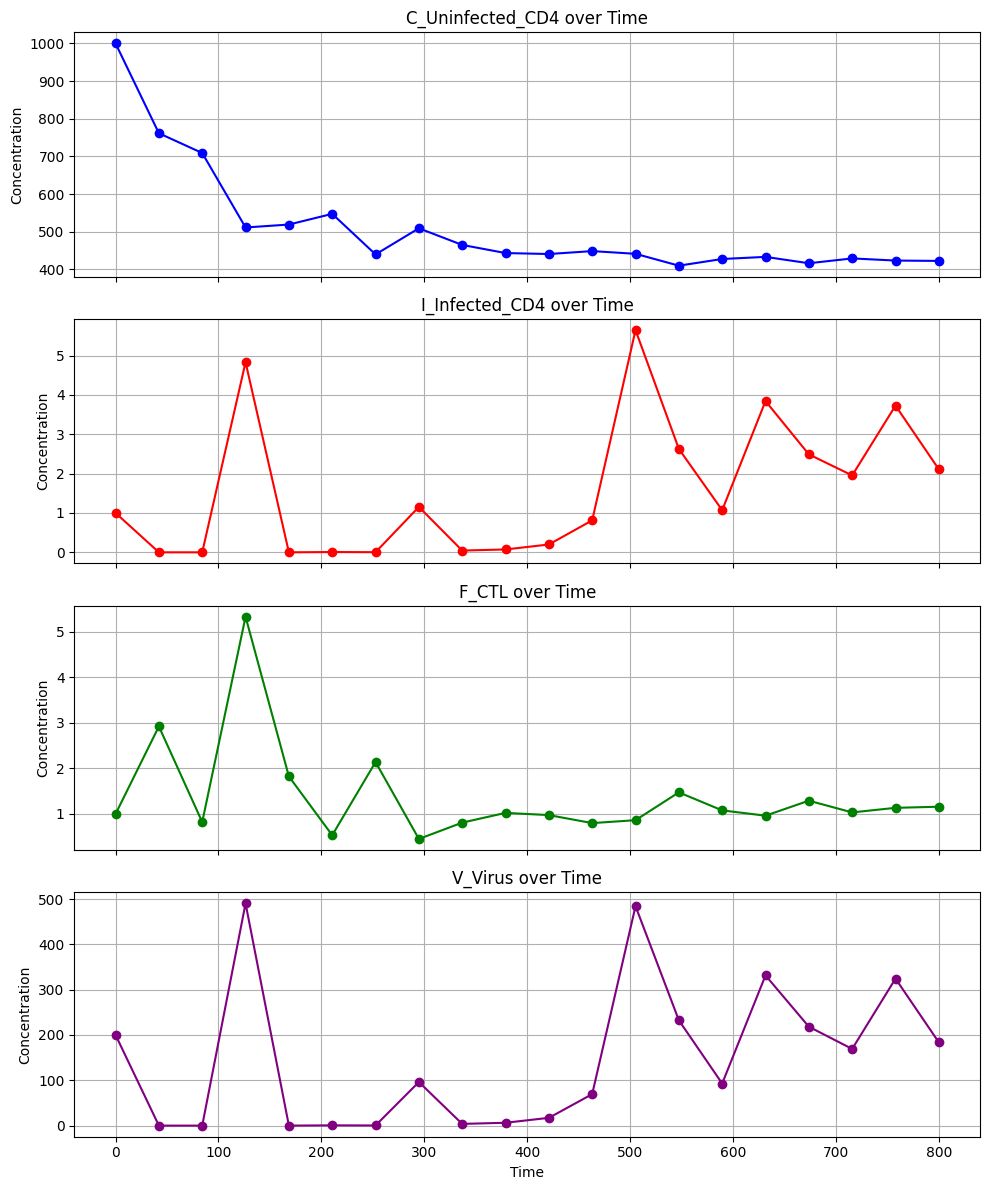

In [32]:
results = np.array(result)

time = results[:, 0]
C_Uninfected_CD4 = results[:, 1]
I_Infected_CD4 = results[:, 2]
F_CTL = results[:, 3]
V_Virus = results[:, 4]

fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

axs[0].plot(time, C_Uninfected_CD4, marker='o', color='blue')
axs[0].set_title('C_Uninfected_CD4 over Time')
axs[0].set_ylabel('Concentration')
axs[0].grid()

axs[1].plot(time, I_Infected_CD4, marker='o', color='red')
axs[1].set_title('I_Infected_CD4 over Time')
axs[1].set_ylabel('Concentration')
axs[1].grid()

axs[2].plot(time, F_CTL, marker='o', color='green')
axs[2].set_title('F_CTL over Time')
axs[2].set_ylabel('Concentration')
axs[2].grid()

axs[3].plot(time, V_Virus, marker='o', color='purple')
axs[3].set_title('V_Virus over Time')
axs[3].set_xlabel('Time')
axs[3].set_ylabel('Concentration')
axs[3].grid()

plt.tight_layout()
plt.show()